Shape of dataset: (6607, 20)

Missing values per column:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


/tmp/ipython-input-3568089245.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3568089245.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

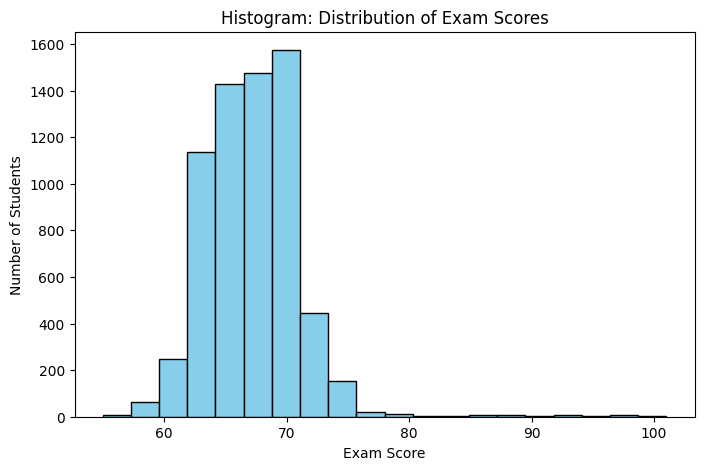

/tmp/ipython-input-3568089245.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Performance_Level', y='Hours_Studied', data=df, palette='Set2')


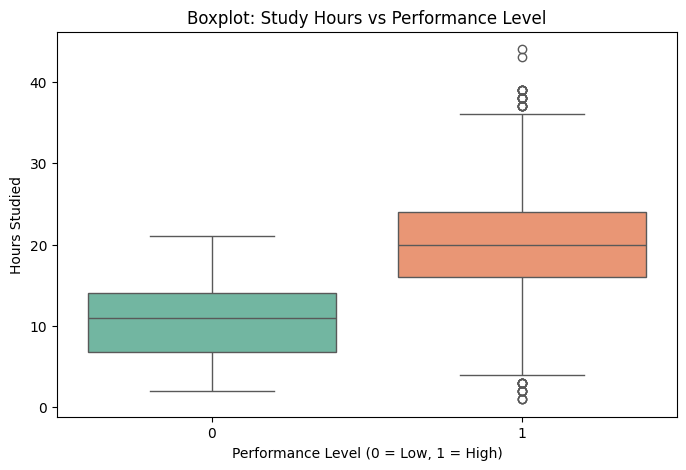

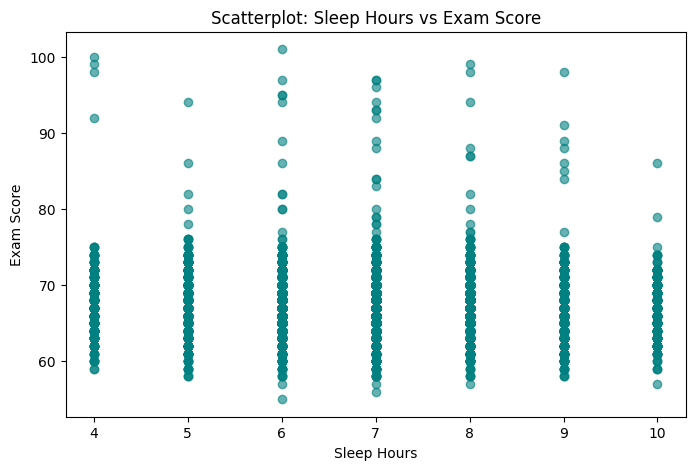

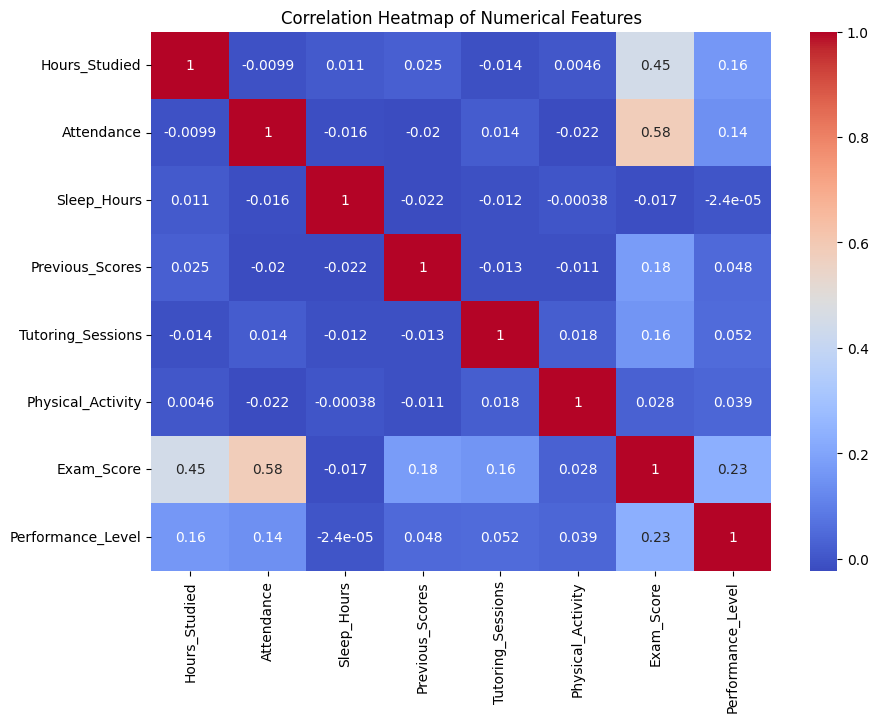

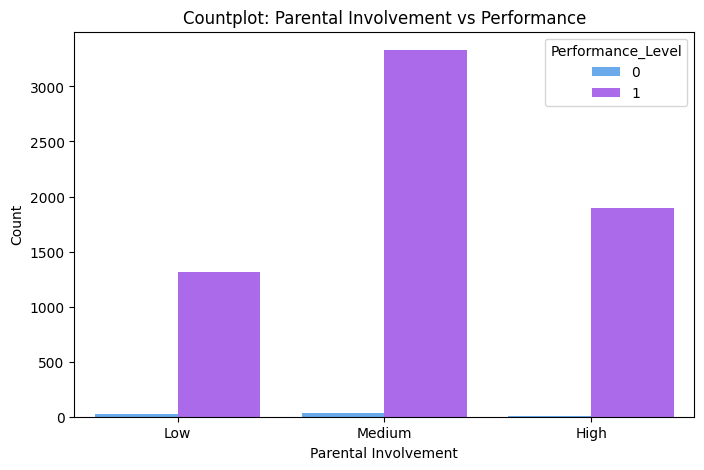

Shape after preprocessing: (6607, 40)
Train shape: (5285, 40) Test shape: (1322, 40)
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9677 - loss: 0.1727 - val_accuracy: 0.9934 - val_loss: 0.0281
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9873 - loss: 0.0456 - val_accuracy: 0.9934 - val_loss: 0.0201
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0261 - val_accuracy: 0.9934 - val_loss: 0.0154
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0226 - val_accuracy: 0.9943 - val_loss: 0.0138
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9903 - loss: 0.0205 - val_accuracy: 0.9934 - val_loss: 0.0108
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9943 - val_loss: 0.0129
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9975 - loss: 0.0088 - val_accuracy: 0.9981 - val_loss: 0.0095
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9943 - val_

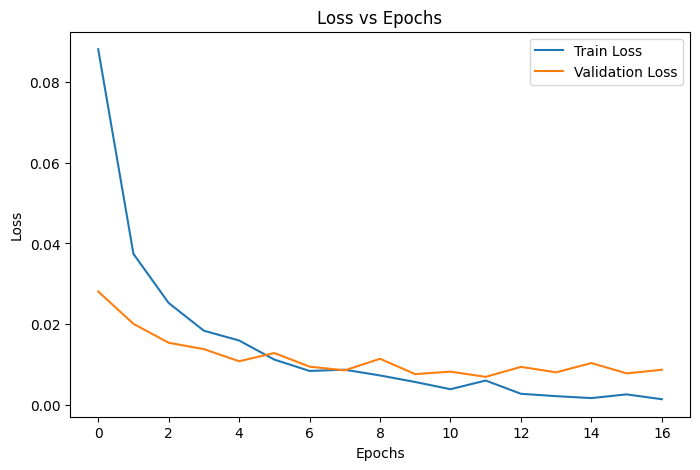

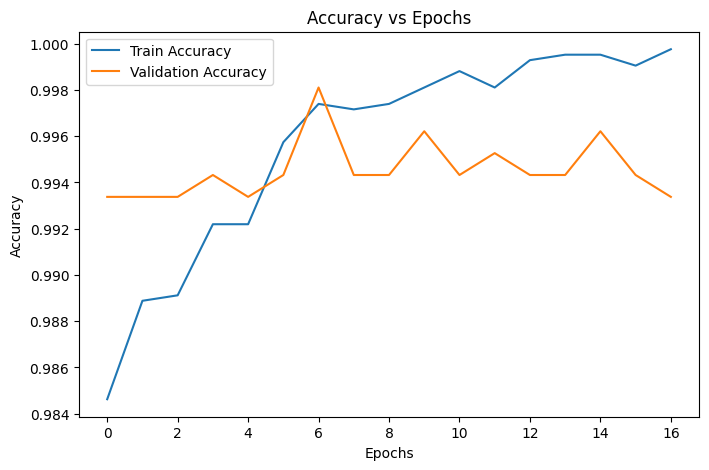

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


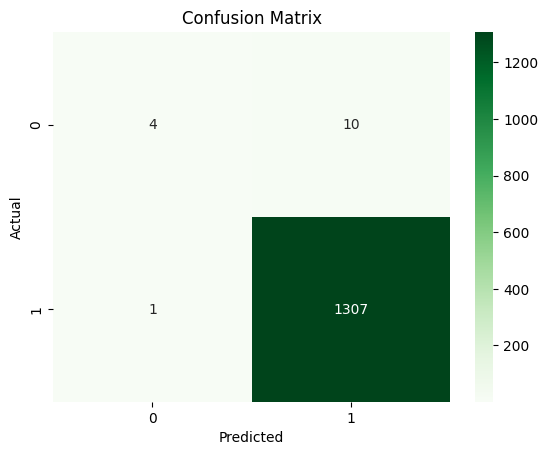


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.29      0.42        14
           1       0.99      1.00      1.00      1308

    accuracy                           0.99      1322
   macro avg       0.90      0.64      0.71      1322
weighted avg       0.99      0.99      0.99      1322



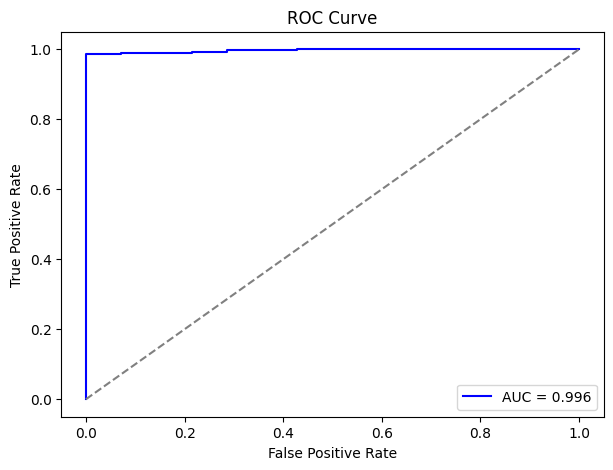


✅ Model Evaluation Complete. Test AUC: 0.996


In [3]:

# 🔹 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Step 1: Load Dataset

df = pd.read_csv("StudentPerformanceFactors.csv")  # Rename to your file name
print("Shape of dataset:", df.shape)
df.head()


# Step 2: Data Understanding & Preprocessing

print("\nMissing values per column:\n", df.isnull().sum())

# Fill missing numeric values with mean and categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Create target: classify high vs low performance
df['Performance_Level'] = np.where(df['Exam_Score'] >= 60, 1, 0)  # 1 = High, 0 = Low


# Step 3: Exploratory Data Analysis (EDA)


# Histogram – Distribution of Exam Scores
plt.figure(figsize=(8,5))
plt.hist(df['Exam_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram: Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Number of Students")
plt.show()
# Shows how student scores are distributed. Reveals if performance skews high or low.

# Boxplot – Study Hours vs Exam Score
plt.figure(figsize=(8,5))
sns.boxplot(x='Performance_Level', y='Hours_Studied', data=df, palette='Set2')
plt.title("Boxplot: Study Hours vs Performance Level")
plt.xlabel("Performance Level (0 = Low, 1 = High)")
plt.ylabel("Hours Studied")
plt.show()
# Shows that students with higher performance study longer on average.

# Scatterplot – Sleep Hours vs Exam Score
plt.figure(figsize=(8,5))
plt.scatter(df['Sleep_Hours'], df['Exam_Score'], alpha=0.6, color='teal')
plt.title("Scatterplot: Sleep Hours vs Exam Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()
# Indicates the relationship between sleep and performance (too little or too much sleep affects scores).

# Correlation Heatmap – Numeric Features
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,7))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Identifies which variables (Hours_Studied, Attendance, Previous_Scores) strongly correlate with Exam_Score.

#  Countplot – Parental Involvement Levels
plt.figure(figsize=(8,5))
sns.countplot(x='Parental_Involvement', hue='Performance_Level', data=df, palette='cool')
plt.title("Countplot: Parental Involvement vs Performance")
plt.xlabel("Parental Involvement")
plt.ylabel("Count")
plt.show()
#  Shows that higher parental involvement correlates with more high-performing students.


# Step 4: Data Preprocessing for Modeling

X = df.drop(['Exam_Score', 'Performance_Level'], axis=1)
y = df['Performance_Level']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Column transformer for preprocessing
ct = ColumnTransformer([
    ('scale', StandardScaler(), numeric_cols),
    ('encode', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_processed = ct.fit_transform(X)
print("Shape after preprocessing:", X_processed.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


# Step 5: Deep Learning Model (MLP)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1, callbacks=[es])


# Step 6: Model Evaluation Visualization


# Loss vs Epoch
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy vs Epoch
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

print(f"\n✅ Model Evaluation Complete. Test AUC: {roc_auc:.3f}")
